In [72]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [73]:
bearsRadio = pd.read_csv('bearRadio.csv')

In [74]:
bearsRadio.shape

(2272, 9)

In [75]:
bearsRadio.head(5)

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Transported,Year
0,314,Male,Adult,NaN,No,No,Vehicle strike-dead,NaN,2022
1,373,Male,Adult,NaN,No,Yes,Active,NaN,2022
2,409,Female,Adult,"3 yearlings, 1 lost",Yes,No,Cast,NaN,2022
3,419,Male,Adult,NaN,No,Yes,Active,NaN,2022
4,424,Male,Adult,NaN,Yes,No,Cast,NaN,2022


In [76]:
bearsRadio.columns

Index(['Bear', 'Sex', 'Age', 'Offspring', 'Out of den', 'Into den',
       'Current status', 'Transported', 'Year'],
      dtype='object')

In [77]:
bearsRadio.dtypes

Bear               int64
Sex               object
Age               object
Offspring         object
Out of den        object
Into den          object
Current status    object
Transported       object
Year               int64
dtype: object

In [78]:
bearsRadio.isna().sum()

Bear                 0
Sex                  0
Age                  2
Offspring         1770
Out of den           1
Into den            12
Current status       0
Transported       2037
Year                 0
dtype: int64

In [79]:
bearsRadio = bearsRadio.drop('Transported', axis=1) # Remove transported column

In [80]:
pd.DataFrame(bearsRadio['Year'].value_counts())

,count
Year,
2021,120
2022,112
2012,112
2017,111
2018,106
2016,106
2020,104
2015,101
2013,99


Note that in the year 2020 we have the most radio bears recorded. 

## Radio in the Den and Out of the Den

In [81]:
pd.DataFrame(bearsRadio['Into den'].value_counts()) # Number of bears who have a radio when entering den

,count
Into den,
Yes,1298
No,954
?,7
Yes?,1


We can so that many bears enter their den with their radio on. Let us see how many bears have a radio when leaving their den and the ratio that happens between bears who enter their den and leave their den with the radio attached.

In [82]:
pd.DataFrame(bearsRadio['Out of den'].value_counts())

,count
Out of den,
Yes,1158
No,1112
Yes??,1


In [83]:
len(bearsRadio[(bearsRadio['Into den']=='Yes') & (bearsRadio['Out of den']=='Yes')])

527

In [84]:
len(bearsRadio[(bearsRadio['Into den']=='Yes') & (bearsRadio['Out of den']=='No')])

771

Note that most bears who enter their den with the radio will no longer have the radio when the leave they den. 

## Current Status

In [85]:
pd.DataFrame(bearsRadio['Current status'].value_counts())

,count
Current status,
Active,1161
Cast,677
active,137
Dead,59
Removed,57
Missing,48
Killed,17
Probable battery failure,11
Unresolved,10


We can see that there are repeated answers in our column which are marked as different for various reasons such as mispellings and cases of the words. In the data cleansing stage we will combine as many as possible. 

In [86]:
bearsRadio.loc[bearsRadio.duplicated(subset=['Bear'])]

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
112,373,Male,Adult,NaN,Yes,No,Cast,2021
114,409,Female,Adult,3 cubs,Yes,Yes,Active,2021
115,424,Male,Adult,NaN,No,Yes,Active,2021
116,460,Male,Adult,NaN,Yes,Yes,Active,2021
117,476,Female,Adult,"1 cub, lost",No,Yes,Active,2021
...,...,...,...,...,...,...,...,...
2267,321,Female,Adult,none,No,Yes,active,1998
2268,322,Female,Subadult,NaN,No,Yes,active,1998
2269,323,Male,Subadult,NaN,No,Yes,active,1998
2270,324,Male,Subadult,NaN,No,Yes,active,1998


<AxesSubplot:xlabel='Bear'>

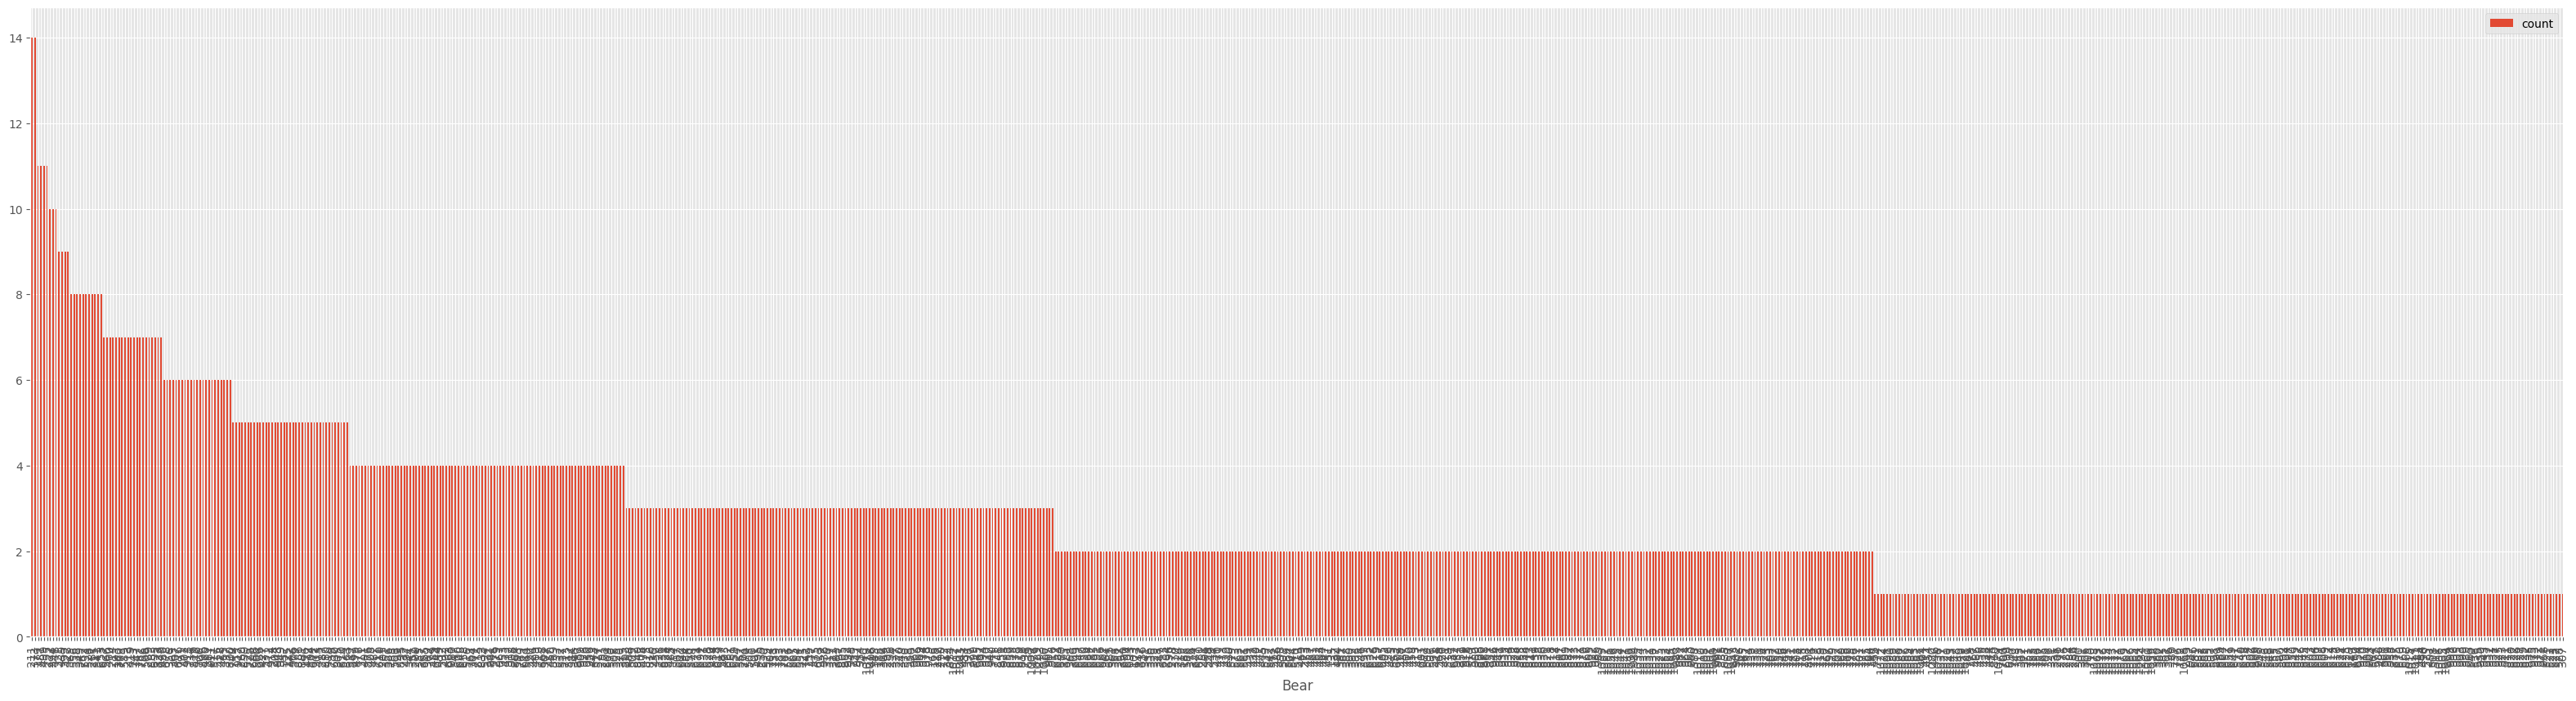

In [100]:
pd.DataFrame(bearsRadio['Bear'].value_counts()).plot(kind='bar', figsize=(40,10)) # Visual Representation of handler captures

In [87]:
bearsRadio.query('Bear == 373')

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
1,373,Male,Adult,NaN,No,Yes,Active,2022
112,373,Male,Adult,NaN,Yes,No,Cast,2021
232,373,Male,Adult,NaN,No,Yes,Active,2020
917,373,Male,Adult,NaN,Yes,No,Cast,2013
1018,373,Male,Adult,NaN,No,Yes,active,2012
1312,373,Male,Adult,NaN,Yes,No,Cast,2009
1400,373,Male,Adult,NaN,Yes,Yes,Active,2008
1486,373,Male,Adult,NaN,No,Yes,Active,2007
1575,373,Male,Adult,NaN,Yes,No,Cast,2006
1665,373,Male,Adult,NaN,No,Yes,Active,2005


In [88]:
bearsRadio.query('Bear == 409')

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
2,409,Female,Adult,"3 yearlings, 1 lost",Yes,No,Cast,2022
114,409,Female,Adult,3 cubs,Yes,Yes,Active,2021
234,409,Female,Adult,NaN,No,Yes,Active,2020
1965,409,Female,Subadult,NaN,No,No,Cast,2002


In [89]:
bearsRadio.query('Bear == 424')

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
4,424,Male,Adult,NaN,Yes,No,Cast,2022
115,424,Male,Adult,NaN,No,Yes,Active,2021
1874,424,Male,Subadult,NaN,Yes,No,Cast,2003
1980,424,Male,Subadult,NaN,No,Yes,Active,2002


In [90]:
bearsRadio.query('Bear == 460')

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
5,460,Male,Adult,NaN,Yes,No,Cast,2022
116,460,Male,Adult,NaN,Yes,Yes,Active,2021
236,460,Male,Adult,NaN,No,Yes,Active,2020
1590,460,Male,Subadult,NaN,Yes,No,Cast,2006
1687,460,Male,Subadult,NaN,Yes,Yes,Active,2005
1799,460,Male,Subadult,NaN,No,Yes,Active,2004


In [91]:
bearsRadio.query('Bear == 476')

,Bear,Sex,Age,Offspring,Out of den,Into den,Current status,Year
6,476,Female,Adult,NaN,Yes,Yes,Active,2022
117,476,Female,Adult,"1 cub, lost",No,Yes,Active,2021
1496,476,Female,Adult,1 yearling,Yes,No,Unresolved,2007
1595,476,Female,Adult,1 COY,Yes,Yes,Active,2006
1701,476,Female,Adult,NaN,Yes,Yes,Active,2005
1815,476,Female,Adult,NaN,No,Yes,Active,2004


In [92]:
pd.DataFrame(bearsRadio['Offspring'].value_counts())

,count
Offspring,
2 yearlings,50
2 COY,50
Not seen,38
2 cubs,28
1 yearling,24
...,...
2 3-year-olds,1
"2 2-year-olds, weaned/lost?",1
"1 yearling, weaned - GB 866",1


<AxesSubplot:xlabel='Offspring'>

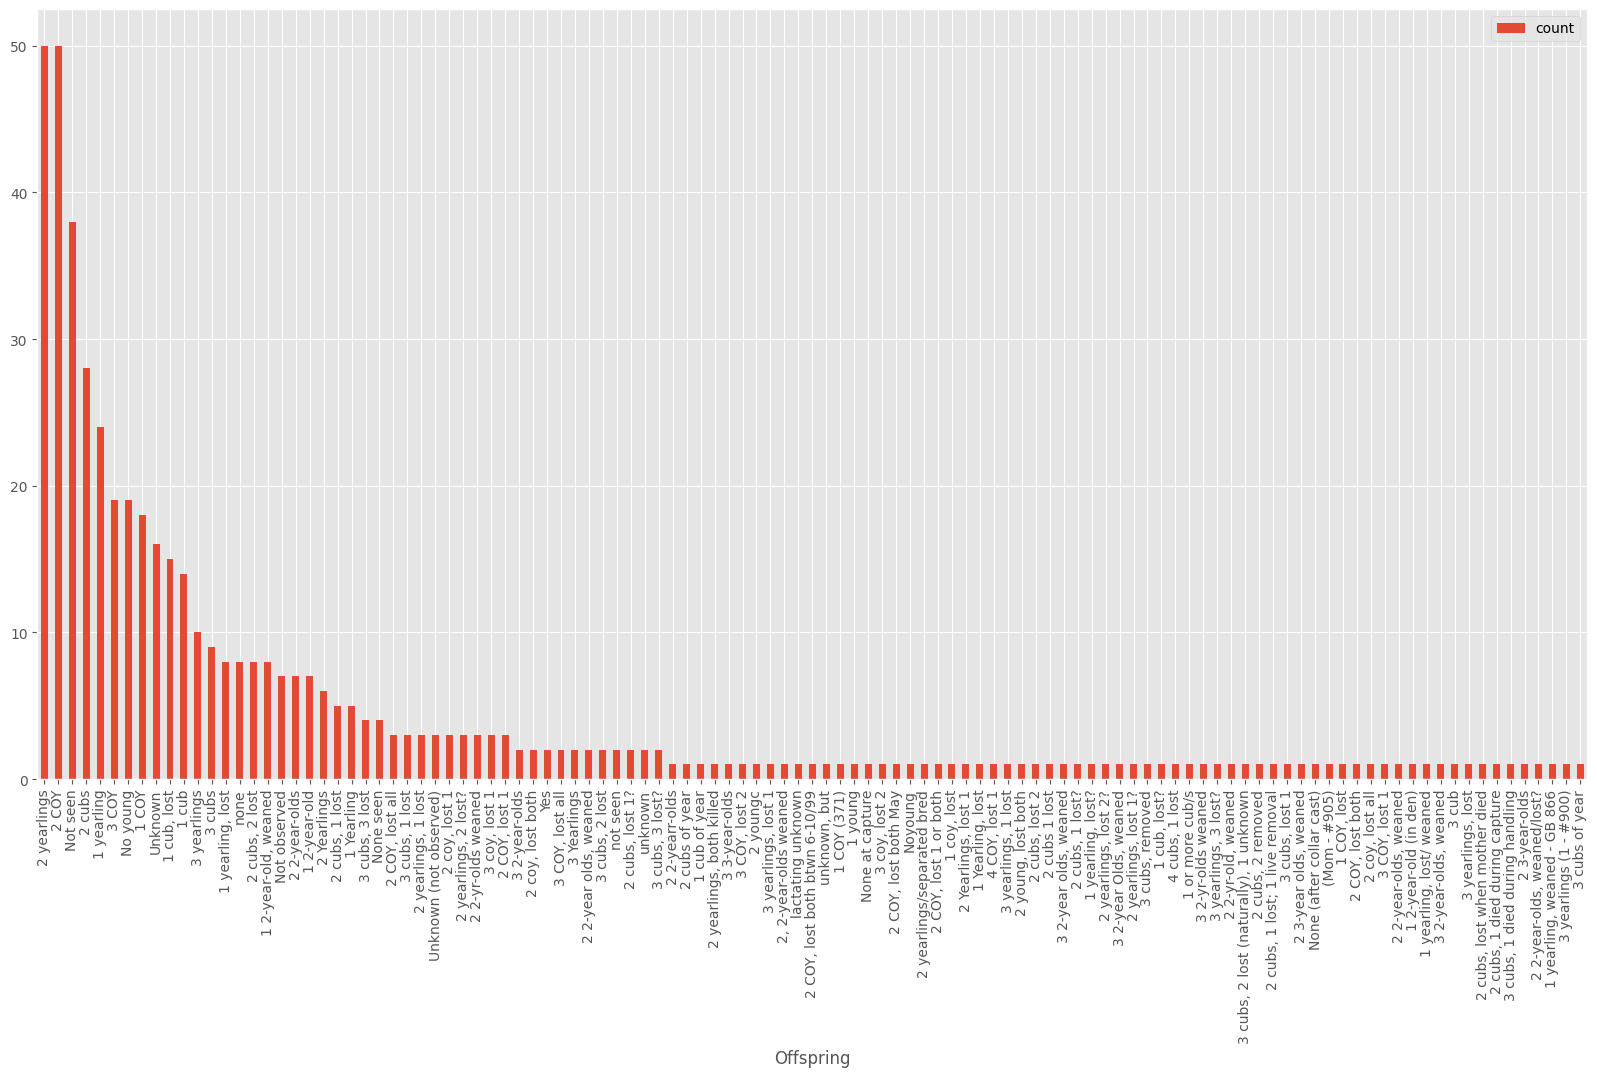

In [93]:
pd.DataFrame(bearsRadio['Offspring'].value_counts()).plot(kind='bar', figsize=(20,10)) # Visual Representation of handler captures

In [97]:
bearsRadio.loc[bearsRadio['Offspring'].isna(), 'Sex'].value_counts()

Sex
Male      1285
Female     485
Name: count, dtype: int64